In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import pylab

In [2]:
categories = [' person', ' bird', ' cat', ' cow', ' dog', ' horse', ' sheep', ' aeroplane', ' bicycle',
              ' boat', ' bus', ' car', ' motorbike', ' train', ' bottle', ' chair', ' diningtable',
              ' pottedplant', ' sofa', ' tvmonitor']

In [3]:
#--------------------------------------------------------------------------------------------------------
#Reads annotations and true skill ratings and creates a dictionary of len 4000 comprising only the images 
# with true skill ratings in my_dict
#--------------------------------------------------------------------------------------------------------

#Creating the my_dict dictionary from the file annotations.csv . Each dict entry has an image_name as the key and 
#a list of all the categories present in that image as the value
my_dict={}
with open('annotations.csv', 'r') as f:
    for line in f:
        items = line.split(',')
        key, values = items[0], items[1:]
        my_dict.setdefault(key, []).extend(values)
lista_all= my_dict.keys()

#Creating the my_dict dictionary from the file true_skill.csv . Each dict entry has an image_name as the key and 
#the true skill rating as the value
true_skill_dict = {}
with open('true_skill.csv', 'r') as f:
    for line in f:
        items = line.split(',')
        key, values = items[0], items[1:]
        true_skill_dict.setdefault(key, []).extend(values)
lista_subset = true_skill_dict.keys()

#Append trueskill ratings to my_dict
for each in my_dict:
    if each in true_skill_dict:
        my_dict[each].append(float(true_skill_dict[each][0]))
        
keys_to_delete = [n for n in my_dict if n not in true_skill_dict]

#Deleting all keys from my_dict that are not common to both my_dict and true_skill_dict (i.e. images without a ts value)
for each in keys_to_delete:
    del my_dict[each]

#Creating a list containing all the ts ratings
ts_list = [n[1][-1] for n in my_dict.items()]

In [8]:
def n_images(low_cutoff,high_cutoff, n=0):
    new_dict = deepcopy(my_dict)
    boundaries = np.percentile(ts_list, [low_cutoff,high_cutoff]).tolist()
    for each in my_dict:
        if new_dict[each][-1] <= boundaries[0]:
            new_dict[each].append('low')
        elif new_dict[each][-1] >= boundaries[1]:
            new_dict[each].append('high')
        else:
            new_dict[each].append('medium')
        
    categories_counters = {}
    #Person
    categories_counters[' person'] = ['low',0,'medium',0,'high',0]
    #Animal
    categories_counters[' bird'] = ['low',0,'medium',0,'high',0]
    categories_counters[' cat'] = ['low',0,'medium',0,'high',0]
    categories_counters[' cow'] = ['low',0,'medium',0,'high',0]
    categories_counters[' dog'] = ['low',0,'medium',0,'high',0]
    categories_counters[' horse'] = ['low',0,'medium',0,'high',0]
    categories_counters[' sheep'] = ['low',0,'medium',0,'high',0]
    #Vehicle
    categories_counters[' aeroplane'] = ['low',0,'medium',0,'high',0]
    categories_counters[' bicycle'] = ['low',0,'medium',0,'high',0]
    categories_counters[' boat'] = ['low',0,'medium',0,'high',0]
    categories_counters[' bus'] = ['low',0,'medium',0,'high',0]
    categories_counters[' car'] = ['low',0,'medium',0,'high',0]
    categories_counters[' motorbike'] = ['low',0,'medium',0,'high',0]
    categories_counters[' train'] = ['low',0,'medium',0,'high',0]
    #Indoor
    categories_counters[' bottle'] = ['low',0,'medium',0,'high',0]
    categories_counters[' chair'] = ['low',0,'medium',0,'high',0]
    categories_counters[' diningtable'] = ['low',0,'medium',0,'high',0]
    categories_counters[' pottedplant'] = ['low',0,'medium',0,'high',0]
    categories_counters[' sofa'] = ['low',0,'medium',0,'high',0]
    categories_counters[' tvmonitor'] = ['low',0,'medium',0,'high',0]
    
    for category in categories_counters:
        for image in new_dict:
            if category in new_dict[image] and 'low' in new_dict[image]:
                categories_counters[category][1] = categories_counters[category][1] +1
            elif category in new_dict[image] and 'medium' in new_dict[image]:
                categories_counters[category][3] = categories_counters[category][3] +1
            elif category in new_dict[image] and 'high' in new_dict[image]:
                categories_counters[category][5] = categories_counters[category][5] +1
    
    for category in categories_counters:
        if categories_counters[category][1] >= n and categories_counters[category][3] >= n:
            print category, categories_counters[category]
    
    container_low = [n[1][1] for n in categories_counters.items()]
    container_medium = [n[1][3] for n in categories_counters.items()]
    container_high = [n[1][5] for n in categories_counters.items()]
    

    fig_size = [9,6]
    plt.ylim(ymax=30)
    plt.rcParams["figure.figsize"] = fig_size
    plt.title('Low load (TS ratings <'+str(round(boundaries[0],2))+')')
    plt.bar(range(len(container_low)), container_low,)
    plt.xticks(range(len(container_low)), categories, rotation=90)
    plt.tight_layout()
    pylab.savefig('low_load.pdf')
    plt.show()
    
    fig_size = [9,6]
    plt.ylim(ymax=30)
    plt.rcParams["figure.figsize"] = fig_size
    plt.title('Medium load (TS ratings between '+str(round(boundaries[0],2))+' and '+ str(round(boundaries[1],2))+')')
    plt.bar(range(len(container_medium)), container_medium,)
    plt.xticks(range(len(container_medium)), categories, rotation=90)
    plt.tight_layout()
    pylab.savefig('medium_load.pdf')
    plt.show()
    
    fig_size = [9,6]
    plt.ylim(ymax=30)
    plt.rcParams["figure.figsize"] = fig_size
    plt.title('High load (TS ratings >'+str(round(boundaries[1],2))+')')
    plt.bar(range(len(container_medium)), container_medium,)
    plt.xticks(range(len(container_medium)), categories, rotation=90)
    plt.tight_layout()
    pylab.savefig('high_load.pdf')
    plt.show()
    
    

 horse ['low', 44, 'medium', 69, 'high', 41]
 sheep ['low', 33, 'medium', 72, 'high', 10]
 motorbike ['low', 12, 'medium', 91, 'high', 73]
 cow ['low', 26, 'medium', 55, 'high', 10]
 cat ['low', 168, 'medium', 140, 'high', 26]
 dog ['low', 166, 'medium', 228, 'high', 52]
 bicycle ['low', 15, 'medium', 102, 'high', 78]
 bus ['low', 7, 'medium', 85, 'high', 39]
 diningtable ['low', 16, 'medium', 75, 'high', 117]
 person ['low', 206, 'medium', 872, 'high', 612]
 sofa ['low', 38, 'medium', 111, 'high', 71]
 aeroplane ['low', 90, 'medium', 90, 'high', 22]
 car ['low', 49, 'medium', 225, 'high', 150]
 bottle ['low', 26, 'medium', 109, 'high', 126]
 chair ['low', 60, 'medium', 203, 'high', 191]
 tvmonitor ['low', 14, 'medium', 74, 'high', 107]
 pottedplant ['low', 33, 'medium', 84, 'high', 86]
 bird ['low', 131, 'medium', 120, 'high', 23]
 train ['low', 10, 'medium', 116, 'high', 58]
 boat ['low', 22, 'medium', 107, 'high', 75]


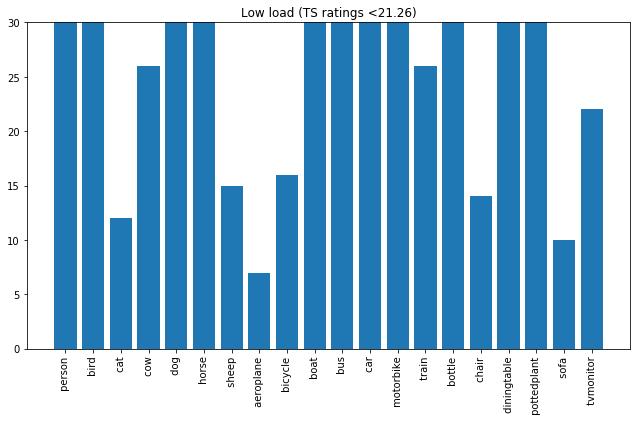

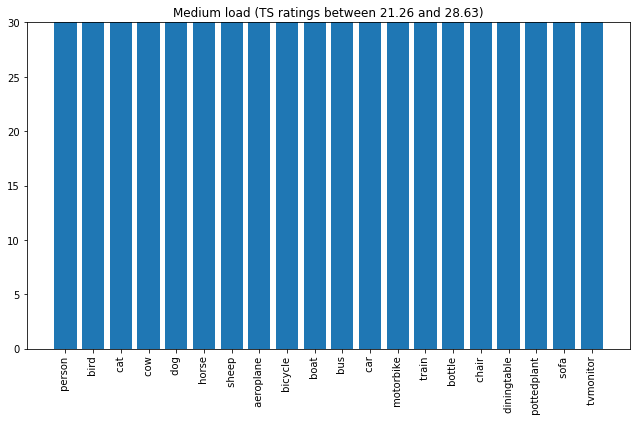

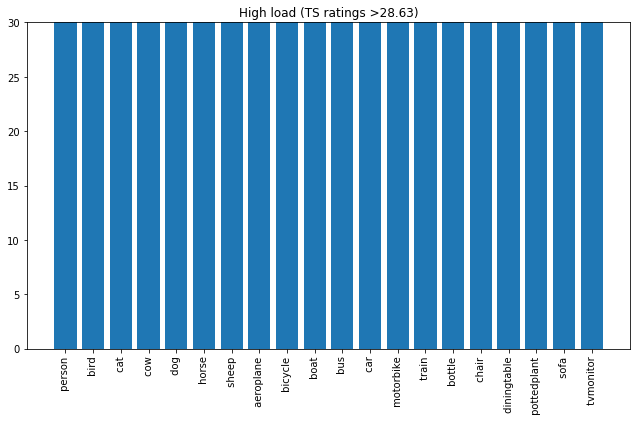

In [9]:
n_images(25,75,0)